# Assignment 3

# Cole Hamilton CSE 590
##  cbhami02@louisville.edu

This assignment deals with using `textblob` and other open-source libraries to perform NLP-based analysis on documents using Python.  **All parts should use the same three documents (as outlined in Part 1 below).  In addition to your .ipynb and/or .py files, you must submit a report document (in .doc or .pdf format) that answers various questions below.** 

**Part 1:**<br> Select and download three texts of your choosing that represent different media or writing formats (for example, you could choose i. a novel, movie script, and play script or ii. a short story, poem, and novel, etc.)
**Make sure you briefly descibe your documents and explain the difference between them in a paragraph.** 

**Part 2:**<br>
(a) Compute word counts for each of your documents after excluding English stop words (and optionally, performing lemmatization).<br>
(b) Create and display a bar plot for each document that include word counts for the 25 most frequent words (after the above processing).<br>
(c) Create and display a word cloud for each document (using a mask image of your choice) that includes only the 100 most frequent words.  Note that you'll likely want to use the approach outlined in Session 25 that utilizes the `fitwords` method, since you will want data consistent with those for part (b).<br>(d) Do you see any notable difference between the documents wrt (b) and/or (c) above?  Try to explain why or why not, and whether you would expect such a difference.<br>

**Part 3:**<br>
(a) Use **Textatistic** to compute the _average_ of the Flesch–Kincaid, Gunning Fog, SMOG, and Dale–Chall scores for each document.   
(b) Are there noticeable differences among your documents's readability scores, and do you suspect any difference is present (or _should be_ present)? 

**Part 4:**<br> 
(a) Use spaCy to compute the pairwise similarity between your documents (i.e. doc. 1 to doc. 2, doc. 1 to doc. 3, doc. 2 to doc. 3).<br>
(b) Do any of these similarity scores seem higher or lower than you would expect?  Explain your response.

**Part 5:**<br>
(a) Use spaCy to find the named entities in your documents.<br>
(b) Produce a bar plot for each document that includes the count for the 20 most common named entities (by name).<br>
(c) Produce a second bar plot per document based on the counts of every named entity type (PERSON, ORG, etc.)<br>
(d) Do you notice any meaningful differences (or similarities) among the documents wrt to these plots?  If so, explain what they are.

### Data/Package Load

In [1]:
#The first thing we need to do is import the packages needed for the entire assignment

import textblob as tb
import numpy as np
import pandas as pd
import nltk as nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pathlib import Path
from textblob import TextBlob
from operator import itemgetter
from pathlib import Path
import urllib
from urllib.request import urlopen
import requests
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### ***Part 1:**<br> Select and download three texts of your choosing that represent different media or writing formats (for example, you could choose i. a novel, movie script, and play script or ii. a short story, poem, and novel, etc.)
**Make sure you briefly descibe your documents and explain the difference between them in a paragraph.** 

Text 1: Great Gatsby book txt file
Text 2: Monty Python and the Holy Grail movie script txt file
Text 3: The Adventures of Sherlock Holmes short story txt file


In [17]:
txt1url = requests.get('https://raw.githubusercontent.com/Cbhami/Coraline/master/ResumeProjects/Cole%20Hamilton%20Resume%20MAR%2022.txt')

Resume = txt1url.text #I need to read in my txt

In [18]:
resume = TextBlob(Resume) 
resume.word_counts #I will pass my movie, book, and story through the the word_counts dictionary

defaultdict(int,
            {'cole': 1,
             'b': 1,
             'hamilton': 1,
             'senior': 11,
             'data': 28,
             'analyst': 5,
             'san': 2,
             'antonio': 2,
             'tx': 2,
             '910-824-1624': 1,
             'cole.b.hamilton': 1,
             'gmail.com': 1,
             'www.linkedin.com/in/hamiltoncole': 1,
             'self-driven': 1,
             'results-oriented': 1,
             'professional': 5,
             'with': 11,
             'excellent': 1,
             'writing': 2,
             'skills': 6,
             'who': 1,
             'has': 1,
             'extensive': 1,
             'experience': 3,
             'managing': 3,
             'recruitment': 1,
             'training': 2,
             'and': 51,
             'agile': 4,
             'team': 6,
             'building': 1,
             'in': 22,
             'united': 2,
             'states': 2,
             'army': 5,
             

In [19]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #We're looking specifically for English stop words
#print(stopwords)

In [20]:
items1 = resume.word_counts.items()    #Here we assign the word count to the item 1 for txt 1, (Monty Python)
print(len(items1)) #This prints the length of the txt files before the stopwords are removed

399


In [21]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #We're looking specifically for English stop words 
#print(stopwords)

In [22]:
items1 = [item for item in items1 if item[0] not in stopwords] #This will pull my stopwords out from items1
print(len(items1)) #This prints the length of the txt files after the stopwords are removed


374


### Word Count


In [23]:
print(str("The difference in word count for my resume is " + str(399 - 374)))

The difference in word count for my resume is 25


## **Part 2:**<br>

In [24]:
sorted_resume = sorted(items1, key=itemgetter(1), reverse=True) #Sorting my items with itemgetter

stopwords1 = ['“', '”', '’', '...', '.', ',', '-', '‘'] #Establishing additional stopwords to pull punctuation out of Great Gatsby specifically. I will run it through all of them though.

sorted_resume = [pair for pair in sorted_resume if pair[0] not in stopwords1] #Run the secondary stopwords removal
#print (sorted_resume)


In [25]:

top25a = sorted_resume[:25] #Count the top 25 from each item
df_resume = pd.DataFrame(top25a, columns=['word', 'count'])  #Add the top 25 items to a pandas DataFrame
df_sorted_resume = pd.DataFrame(sorted_resume, columns=['word', 'count'])  #Add the top 25 items to a pandas DataFrame

In [26]:
df_resume.sort_values(by=['count'], ascending=False) #sorting by descending value to verify the dataframe is working
df_resume.head()

,word,count
0,data,28
1,senior,11
2,business,9
3,management,8
4,skills,6


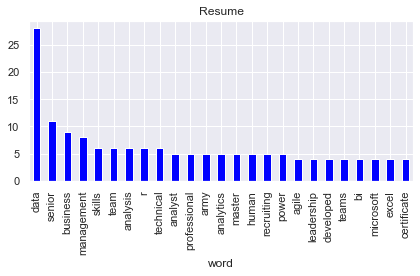

In [27]:
df_resume.plot.bar(x='word', y='count',color = 'blue', legend=False)
plt.title('Resume')
plt.gcf().tight_layout()
sns.set()

In [28]:
from PIL import Image #import the components for wordcloud
import numpy as np
from wordcloud import WordCloud   

In [33]:
import imageio #import the imageio package
mask_image1 = imageio.imread('Python.png') #set the images for my wordclouds

In [34]:
wordcloud1 = WordCloud(width=1000, height=1000, #These lines set the dimensions for the wordclouds. Specifically ensuring the max words is equal to 100
    colormap='prism', max_words = 100, mask=mask_image1, background_color='white')

In [35]:
from pathlib import Path
resume_text = Path('Cole Hamilton Resume MAR 22.txt').read_text(encoding='utf-8') #Reading the text in for the wordcloud image per txt file
resume_wordcloud = wordcloud1.generate(resume_text)

from wordcloud import WordCloud   
resume_wordcloud = wordcloud1.to_file('resume.png')

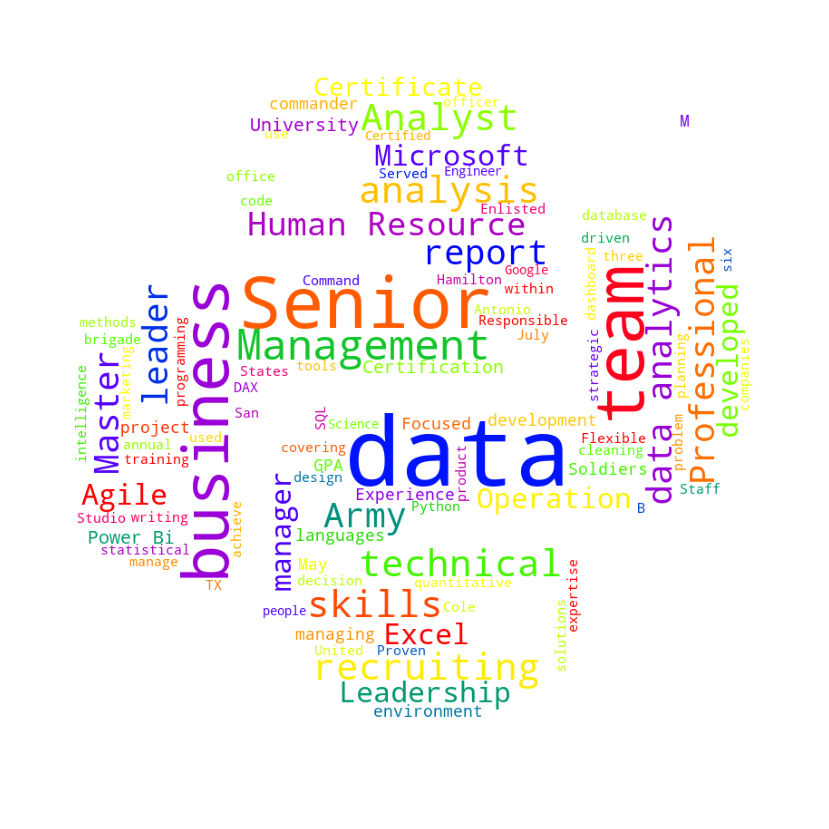

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(resume_wordcloud)

## Answer 2

The word cloud and bar plots were aligned to one another accurately. The names and words that populated in the bar chart were emphasized in the wordcloud. The wordcloud program increased the size and used quality placement of the most recurring words in the text. I wouldn't say there were notable differences between the two.

## **Part 3:**<br>
(a) Use **Textatistic** to compute the _average_ of the Flesch–Kincaid, Gunning Fog, SMOG, and Dale–Chall scores for each document.
   
(b) Are there noticeable differences among your documents's readability scores, and do you suspect any difference is present (or _should be_ present)? 

In [37]:
#First read in the text for textatistic
from pathlib import Path
textatistic_resume = Path('Cole Hamilton Resume MAR 22.txt').read_text(encoding='utf-8')

In [38]:
from textatistic import Textatistic
readability_resume = Textatistic(textatistic_resume) #determine the readability for each by running the texatistic function

In [39]:
%precision 3
readability_resume.dict() #determine the readability

{'char_count': 4963,
 'word_count': 792,
 'sent_count': 46,
 'sybl_count': 1435,
 'notdalechall_count': 424,
 'polysyblword_count': 190,
 'flesch_score': 36.075,
 'fleschkincaid_score': 12.505,
 'gunningfog_score': 16.483,
 'smog_score': 14.739,
 'dalechall_score': 12.944}

## **Part 4:**<br> 
(a) Use spaCy to compute the pairwise similarity between your documents (i.e. doc. 1 to doc. 2, doc. 1 to doc. 3, doc. 2 to doc. 3).<br>

(b) Do any of these similarity scores seem higher or lower than you would expect?  Explain your response.

In [40]:
import spacy #import the large spaCY package
nlp_md = spacy.load('en_core_web_md')  
nlp_md.max_length = 1500000

In [41]:
#Create the docs for spaCY to read
from pathlib import Path
document1 = nlp_md(Path('Cole Hamilton Resume MAR 22.txt').read_text(encoding='utf-8'))
document2 = nlp_md(Path('Job Search.txt').read_text(encoding='utf-8'))

FileNotFoundError: [Errno 2] No such file or directory: 'Job Search.txt'

In [ ]:
docsim=document1.similarity(document2)
print(f'Resume to Job similarity is {docsim:.3}.') #This generates my spaCY similarity score for GG -> MP

Resume to Job similarity is 0.974.


## **Part 5:**<br>
(a) Use spaCy to find the named entities in your documents.<br>

(b) Produce a bar plot for each document that includes the count for the 20 most common named entities (by name).<br>

(c) Produce a second bar plot per document based on the counts of every named entity type (PERSON, ORG, etc.)<br>

(d) Do you notice any meaningful differences (or similarities) among the documents wrt to these plots?  If so, explain what they are.

In [ ]:
#spaCY load
#use encore web md

document = nlp_md(Path('Cole Hamilton Resume MAR 22.txt').read_text(encoding = 'utf-8') + 
    Path('Job Search.txt').read_text(encoding = 'utf-8'))

### Great Gatsby

In [ ]:
document1 = nlp_md(Path('Cole Hamilton Resume MAR 22.txt').read_text(encoding = 'utf-8'))
for entity in document1.ents: #run through the document.ents (adding entity and label)
    print(f'{entity.text}:{entity.label_}')

Cole B. Hamilton:PERSON
San Antonio:GPE
TX:GPE
910:CARDINAL
United States Army:ORG
Agile Project Management:ORG
Human Resources:ORG
Staff Development:ORG
MS Teams:ORG
Python:ORG
San Antonio:GPE
TX:GPE
five:CARDINAL
the United States:GPE
Power Bi:PRODUCT
Microsoft Excel:ORG
2,400:CARDINAL
millions:CARDINAL
SQL:ORG
Army:ORG
Microsoft Excel:ORG
Power Bi:PERSON
8:CARDINAL
Mission Report:ORG
SQL:ORG
M:ORG
2018 - July 2020:DATE
one:CARDINAL
three:CARDINAL
Iowa:GPE
30:CARDINAL
30:CARDINAL
annual:DATE
six:CARDINAL
annual:DATE
210:CARDINAL
Soldiers:ORG
over 30:CARDINAL
four:CARDINAL
2004 - May 2018:DATE
Army:ORG
12 years:DATE
Heidelberg MEPS:ORG
three:CARDINAL
NATO:ORG
UN:ORG
DOD:ORG
US:GPE
the 82nd Airborne Division:ORG
NC:GPE
Operation Enduring:ORG
May 2023:DATE
University of Louisville:ORG
KY:GPE
Human Resource Management:ORG
3.77:CARDINAL
Northcentral University:ORG
La Jolla:GPE
Arts:ORG
3.5:CARDINAL
Liberty University:ORG
Lynchburg:GPE
VA:GPE
Business Administration:ORG
GPA:ORG
3.82:CARDIN

In [ ]:
from collections import Counter
from matplotlib import figure
from matplotlib import pyplot as plt


In [ ]:
my_dict1 = pd.DataFrame.from_dict(document1.ents) 
my_dict1 #Here I have an issue with the dictionary not translating over one for one to a pd dataframe

,0,1,2,3,4,5,6,7
0,Cole,B.,Hamilton,None,None,None,None,None
1,San,Antonio,None,None,None,None,None,None
2,TX,None,None,None,None,None,None,None
3,910,None,None,None,None,None,None,None
4,United,States,Army,None,None,None,None,None
...,...,...,...,...,...,...,...,...
72,Cornell,Data,Science,Certificate,-,R,None,None
73,USC,Intermediate,Data,Analytics,Certificate,-,Microsoft,Excel
74,Power,Bi,None,None,None,None,None,None
75,IBM,Data,Analyst,Certificate,-,Python,None,None


In [ ]:
def new_dictionary(document): #This function will split the document into an organized list
    ent_text = [] #Creating an empty list to add my words to
    for entity in document1.ents:
        ent_text.append(entity.text)

    dict_ent_name = Counter(ent_text)

    return dict_ent_name

def new_dataframe(document):
    df_ent = new_dictionary(document)
    df_doc = pd.DataFrame(data = {'name' :df_ent.keys(), 'count' : df_ent.values()})
    return df_doc

my_new_dict_1 = new_dictionary(document1)
new_doc1 = new_dataframe(my_new_dict_1)
new_doc1.head(5)
sorted_Gatsby_1 = new_doc1.sort_values(by = 'count', ascending = False)
sorted_Gatsby_1_20 = sorted_Gatsby_1[:20]

In [ ]:

def new_dictionary11(document): #Just as I did for the ent text, I will repeat for the ent_label
    ent_label11 = []
    for entity in document1.ents:
        ent_label11.append(entity.label_)

    dict_ent_name11 = Counter(ent_label11)

    return dict_ent_name11

def new_dataframe11(document):
    df_ent11 = new_dictionary11(document)
    df_doc11 = pd.DataFrame(data = {'name' :df_ent11.keys(), 'count' : df_ent11.values()})
    return df_doc11

my_new_dict_11 = new_dictionary11(document1)
new_doc11 = new_dataframe11(my_new_dict_11)
sorted_Gatsby_11 = new_doc11.sort_values(by = 'count', ascending = False)
sorted_Gatsby_11.head(20)



,name,count
3,ORG,37
2,CARDINAL,18
1,GPE,13
5,DATE,6
0,PERSON,2
4,PRODUCT,1


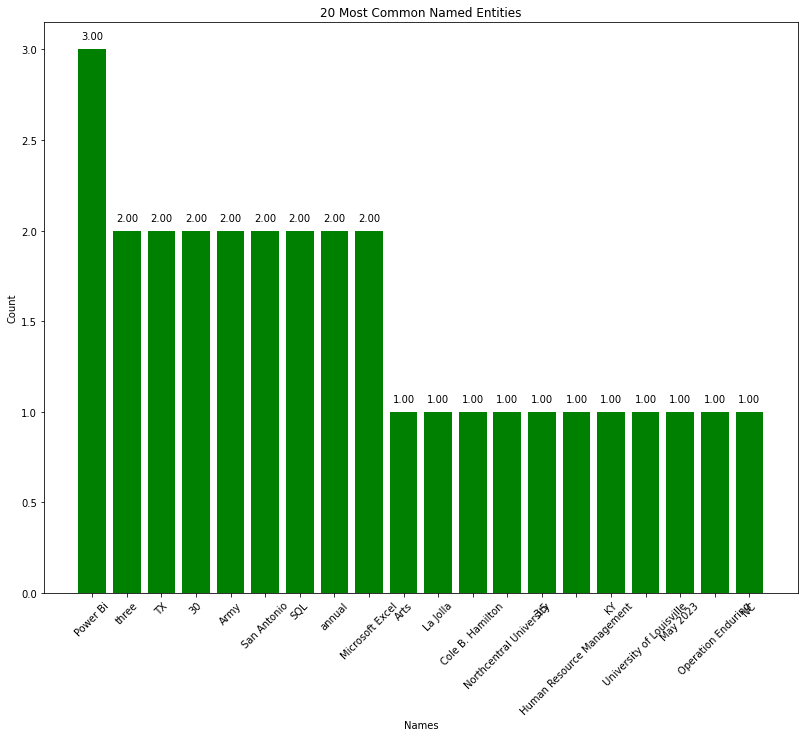

In [ ]:
plt.bar(sorted_Gatsby_1_20['name'], sorted_Gatsby_1_20['count'], color ='green')
fig = plt.gcf()
fig.set_size_inches(13.5, 10.5)
plt.xticks(rotation = 45)
plt.title('20 Most Common Named Entities')
plt.xlabel('Names')
plt.ylabel('Count')
xs = sorted_Gatsby_1_20['name']
ys = sorted_Gatsby_1_20['count']
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)      #I used an example I found online to assist with labeling the data points. Although not necessary, it helps with the smaller data points towards the bottom and gives context to the bars

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 
plt.show()

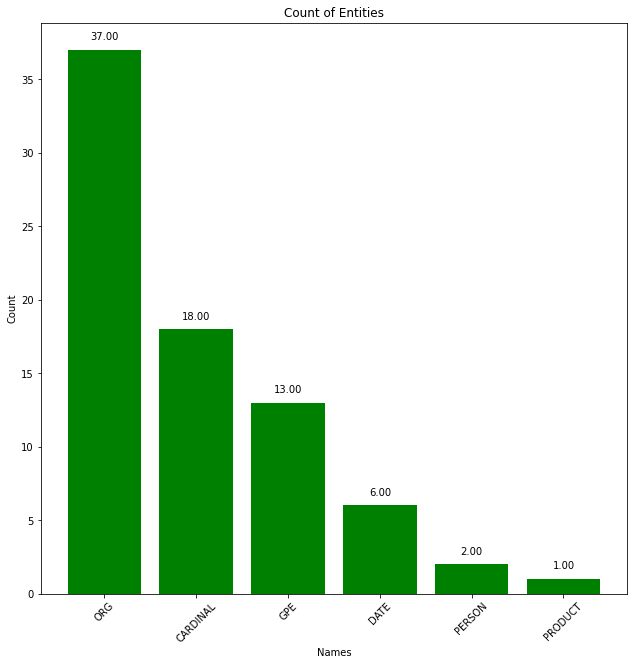

In [ ]:
plt.bar(sorted_Gatsby_11['name'], sorted_Gatsby_11['count'], color='green')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.xticks(rotation = 45)
plt.rcParams["figure.figsize"] = (40,3)
plt.title('Count of Entities')
plt.xlabel('Names')
plt.ylabel('Count')
xs = sorted_Gatsby_11['name']
ys = sorted_Gatsby_11['count']
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 
plt.show()